## Kaggle score: 20662 (The lower the better)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/train_fe_v0.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/test_fe_v0.csv')

# Fit model

# Define predictors and target

In [3]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0' ])
x = train[x_columns].values
y = train['SalePrice'].values


## Split data

In [4]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

# Model

In [5]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [6]:
y_pred = model.predict(x_test)
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [7]:
print(f'R2 = {round(R2,3)} and MAE = {round(MAE,3)}')

R2 = 0.824 and MAE = 22381.126


In [8]:
model.coef_

array([-4.90756250e+04, -6.73956846e+03, -7.59648074e+03, -8.55678203e+03,
        1.61302865e+04,  2.61707306e+03,  1.51975228e+03,  1.80082028e+04,
        9.11911666e+04,  7.21196461e+03, -4.60617895e+02,  6.29140727e+04,
        1.36620493e+03, -1.26685364e+05, -3.09550968e+04, -4.63467154e+02,
        9.46922189e+04,  4.16587625e+04, -4.05036073e+03, -3.55190340e+03,
        1.11559618e+04,  3.87413616e+04,  1.25929024e+03,  6.34100807e+03,
       -7.25463460e+03,  3.58544698e+04,  6.78307864e+03, -1.59337739e+03,
       -1.08452020e+03,  2.37390285e+04, -1.69000345e+04,  2.23671720e+04,
       -4.14411037e+03, -1.37047520e+15,  1.14477071e+04, -3.57916449e+14,
       -5.67227154e+14,  1.48362924e+15,  1.33486418e+04,  8.34218845e+03,
       -2.22484773e+03, -2.00209162e+04, -1.72310838e+14, -8.16479763e+13,
       -2.26162918e+13,  2.09872861e+14,  1.97090904e+04, -1.06391400e+04,
        7.78115929e+03,  7.48368745e+03, -5.90745665e+04, -5.85622788e+04,
        4.37311824e+04,  

## mean R2

0.776719808297895


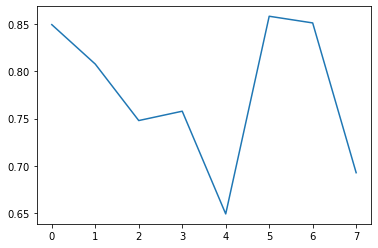

In [17]:
R2s = list()
MAEs = list()
for i in range(8):
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.2, random_state=i)
    # start model
    model = LinearRegression()
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
plt.plot(R2s)
print(np.mean(R2s))

# Making predictions

In [10]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,-56.815502,-2.210544,-57.368806,-10507.754086,0.004135,-0.903515,-0.430737,-0.716977,...,-14.904376,-2.776017,-0.008959,-3.100965,-2.177636,-43.758787,-5.773636,-1505.3153,-3.777739,-3.029083
1,1,1462,-56.815502,-1.960544,-57.365611,-10507.741723,0.004135,-0.903515,-0.097404,-0.716977,...,-15.154376,-2.776017,-0.008959,-2.600965,-2.427636,-42.952335,-5.773636,-1505.3153,-3.777739,-3.029083
2,2,1463,-56.580208,-1.960544,-57.387975,-10507.743765,0.004135,-0.903515,-0.097404,-0.716977,...,-15.154376,-2.776017,-0.008959,-3.100965,-2.177636,-43.758787,-6.046363,-1505.3153,-3.777739,-3.029083
3,3,1464,-56.580208,-1.960544,-57.375196,-10507.761770,0.004135,-0.903515,-0.097404,-0.716977,...,-15.154376,-2.776017,-0.008959,-2.600965,-2.177636,-43.758787,-5.773636,-1505.3153,-3.777739,-3.029083
4,4,1465,-56.227267,-1.960544,-57.487017,-10507.785014,0.004135,-0.903515,-0.097404,-0.050310,...,-14.854376,-2.776017,-0.008959,-2.600965,-2.177636,-43.758787,-6.228181,-1505.3153,-3.777739,-3.029083


In [11]:
x_ids = test['Id']
test_columns = test.columns.drop(['Unnamed: 0','Id'])
x_test_2 = test[test_columns].values

x_ids


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [12]:
y_pred_2 = model.predict(x_test_2)

final=pd.DataFrame(data={'Id':x_ids,'SalePrice':y_pred_2})
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [13]:
# Run the code to save predictions in the format used for competition scoring

final.to_csv('submission.csv',index=False)

# Submiting 